In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
homedir='./'
train=pd.read_csv(homedir+'train.csv')
test=pd.read_csv(homedir+'test.csv')

train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


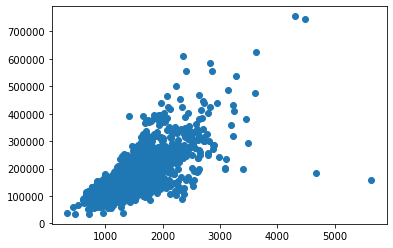

In [4]:
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])

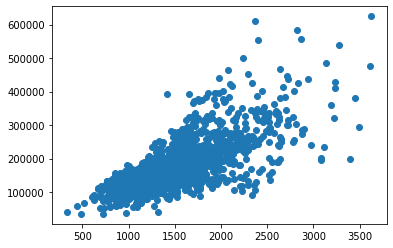

In [5]:
idx_to_drop=train[(train['GrLivArea']>4000)].index
train.drop(idx_to_drop, inplace=True)
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'])

In [6]:
salePrice=train.pop('SalePrice')
salePrice_log = np.log(salePrice)
Id=train.pop('Id')

In [7]:
train['TotalSF'] = (
    train['BsmtFinSF1'].fillna(0) +
    train['BsmtFinSF2'].fillna(0) +
    train['1stFlrSF'].fillna(0) +
    train['2ndFlrSF'].fillna(0)
)

In [8]:
continous_cols=['LotArea','MasVnrArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                'LowQualFinSF','GrLivArea','BedroomAbvGr','KitchenAbvGr','Fireplaces',
                'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
               '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','LotFrontage','TotalSF']
categorical_cols = [col for col in train.columns if col not in continous_cols]
for col_name, col in train[categorical_cols].items():
    train[col_name] = col.astype('category').cat.as_ordered()
ordinal_column_data = [
    ('ExterQual', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
    ('ExterCond', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
    ('BsmtQual', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
    ('BsmtExposure', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
    ('BsmtFinType1', ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']),
    ('BsmtFinType2', ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']),
    ('HeatingQC', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
    ('KitchenQual', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
    ('FireplaceQu', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
    ('GarageFinish', ['Unf', 'Rfn', 'Fin']),
    ('GarageQual', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
    ('GarageCond', ['Po', 'Fa', 'TA', 'Gd', 'Ex']),
    ('PoolQC', ['Fa', 'TA', 'Gd', 'Ex']),
    ('OverallQual', list(range(1, 11))),
    ('OverallCond', list(range(1, 11))),
    ('LandSlope', ['Sev', 'Mod', 'Gtl']),  # Assume less slope is better
    ('Functional', ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']),
    ('YearBuilt', list(range(1800, 2018))),
    ('YrSold', list(range(2006, 2018))),
    ('GarageYrBlt', list(range(1900, 2018))),
    ('YearRemodAdd', list(range(1900, 2018)))
]
ordinal_cols = [C[0] for C in ordinal_column_data]
for col, categories in ordinal_column_data:
    train[col].cat.set_categories(categories, ordered=True, inplace=True)
other_cat_cols = [col for col in categorical_cols if col not in ordinal_cols]

In [9]:
NAs={}
for col in (
    'GarageArea', 'GarageCars', 'BsmtFinSF1',
    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
    'MasVnrArea'
):
    NAs[col]=0
    train[col] = train[col].fillna(0)
    train[f'{col}_na'] = pd.isna(train[col])
    
for col in continous_cols:
    if not len(train[train[col].isna()]):
        continue
    median = train[col].median()
    train[f'{col}_na'] = pd.isna(train[col])
    train[col] = train[col].fillna(median)
    NAs[col] = median

In [10]:
from scipy.stats import skew
skew_feats = train[continous_cols].apply(skew).sort_values(ascending=False)

<AxesSubplot:xlabel='MiscVal', ylabel='Density'>

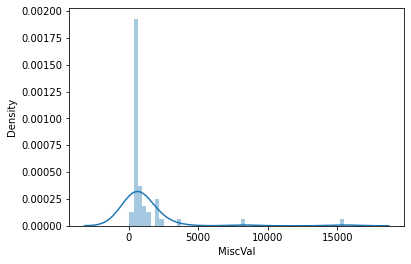

In [11]:
sns.distplot(train[train['MiscVal'] != 0]['MiscVal'])

<AxesSubplot:xlabel='MiscVal', ylabel='Density'>

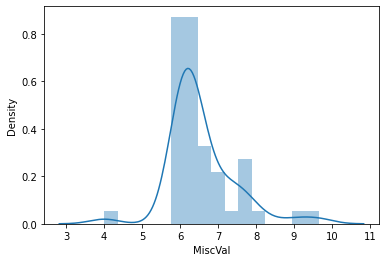

In [12]:
skew_feats = skew_feats[abs(skew_feats) > 0.75]

for feat in skew_feats.index:
    train[feat] = np.log1p(train[feat])
sns.distplot(train[train['MiscVal'] != 0]['MiscVal'])

In [13]:
train_numeric=train.copy()
dummies=pd.get_dummies(train_numeric[other_cat_cols],dummy_na=True)
for col_name in categorical_cols:
    train_numeric[col_name] = train_numeric[col_name].cat.codes + 1
train_numeric.drop(other_cat_cols, axis=1, inplace=True)
train_numeric = pd.concat([train_numeric, dummies], axis=1)

In [14]:
salePrice_log = np.log(salePrice)

In [15]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=42)
model = Lasso(alpha=0.0004)
scores = np.sqrt(
    -cross_val_score(model, train_numeric, salePrice_log, cv=kf, scoring='neg_mean_squared_error'))

In [16]:
scores.mean()

0.10932224929397119

In [17]:
final_model  = Lasso(alpha=0.0004)
final_model.fit(train_numeric, salePrice_log)

Lasso(alpha=0.0004)

In [18]:
test=pd.read_csv(homedir+'test.csv')
house_ids = test.pop('Id')

In [19]:
test['TotalSF'] = (
    test['BsmtFinSF1'].fillna(0) +
    test['BsmtFinSF2'].fillna(0) +
    test['1stFlrSF'].fillna(0) +
    test['2ndFlrSF'].fillna(0)
)

In [20]:
for col_name in categorical_cols:
    test[col_name] = (
        pd.Categorical(
            test[col_name],
            categories=train[col_name].cat.categories,
            ordered=True))

In [21]:
for col in continous_cols:
    if col not in NAs:
        continue
    test[f'{col}_na'] = pd.isna(test[col])
    test[col] = test[col].fillna(NAs[col])

In [22]:
# Handle any other NAs
test[continous_cols] = test[continous_cols].fillna(
    test[continous_cols].median()
)

In [23]:
for feat in skew_feats.index:
    test[feat] = np.log1p(test[feat])
df_test = test.copy()

In [24]:
df_test = test.copy()
test_dummies = pd.get_dummies(df_test[other_cat_cols], dummy_na=True)
for col_name in categorical_cols:
    # Use +1 to push the -1 NaN value to 0
    df_test[col_name] = df_test[col_name].cat.codes + 1
df_test.drop(other_cat_cols, axis=1, inplace=True)
df_test = pd.concat([df_test, test_dummies], axis=1)

In [25]:
df_test['LotFrontage_na']=0
# test_preds = final_model.predict(df_test)

In [26]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(train_numeric, salePrice_log)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
acc_xgb = round(xgb.score(train_numeric, salePrice_log) * 100, 2)
acc_xgb

98.41

In [28]:
df_test=df_test[train_numeric.columns]
test_preds = xgb.predict(df_test)

In [29]:
pd.DataFrame(
    {'Id': house_ids, 'SalePrice': test_preds}
).to_csv(homedir+'output.csv',index=0)